# YOLOV8 Görüntü Sınıfladırma


## Ortam Hazırlığı

In [1]:
# Drive"a bağlanma
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/YOLOV8/0_image_classification

/content/drive/MyDrive/YOLOV8/0_image_classification


In [4]:
# Ultralytics indirme
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


## Sınıflandırma / Prediction

In [5]:
# Resim Sınıflandırma / Test / ImageNet
!yolo classify predict model=yolov8l-cls.pt source="https://upload.wikimedia.org/wikipedia/commons/1/18/Dog_Breeds.jpg" save=True

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 37465576 parameters, 0 gradients, 99.7 GFLOPs

Found https://upload.wikimedia.org/wikipedia/commons/1/18/Dog_Breeds.jpg locally at Dog_Breeds.jpg
100% 755k/755k [00:00<00:00, 21.1MB/s]
image 1/1 /content/drive/MyDrive/YOLOV8/0_image_classification/Dog_Breeds.jpg: 224x224 golden_retriever 0.95, Labrador_retriever 0.03, Brittany_spaniel 0.01, kuvasz 0.00, clumber 0.00, 15.8ms
Speed: 18.7ms preprocess, 15.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


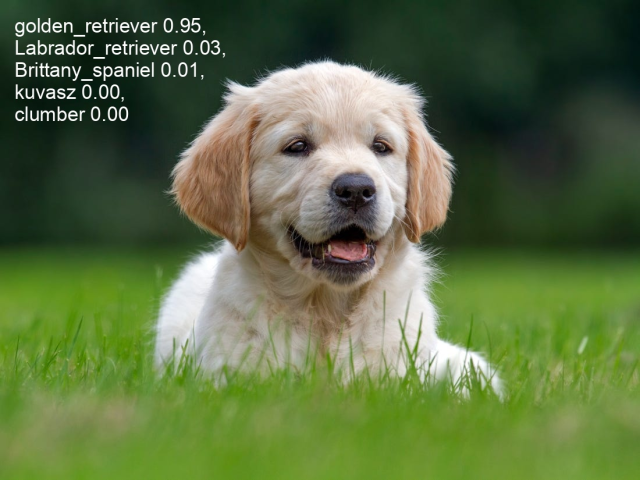

In [6]:
# Sonuçları İncele
import cv2
import imutils
from google.colab.patches import cv2_imshow

img_path = "/content/drive/MyDrive/YOLOV8/0_image_classification/runs/classify/predict/prediction_1.jpg"


img = cv2.imread(img_path)
img = imutils.resize(img,width=640)
cv2_imshow(img)


In [7]:
import numpy as np
from ultralytics import YOLO

img_path = "runs/classify/predict/prediction_1.jpg"
model_path= "yolov8l-cls.pt"

model = YOLO(model_path) # modeli yükleme
results = model(img_path) # resmi yükle ve sınıflandır

class_dict = results[0].names
probs = results[0].probs.data.tolist()

print("Sınıflar",class_dict)
print("Olasılıklar",probs)

print("Sonuc:",class_dict[np.argmax(probs)])



image 1/1 /content/drive/MyDrive/YOLOV8/0_image_classification/runs/classify/predict/prediction_1.jpg: 224x224 golden_retriever 0.94, Labrador_retriever 0.04, kuvasz 0.01, Brittany_spaniel 0.00, clumber 0.00, 10.9ms
Speed: 1.6ms preprocess, 10.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


Sınıflar {0: 'tench', 1: 'goldfish', 2: 'great_white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'electric_ray', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'American_chameleon', 41: 'whiptail', 42: 'agama', 43: 'frilled_lizard', 44: 'alligator_lizard', 45: 'Gila_monster', 46: 'green_lizard', 47: 'African_chameleon', 48: 'Komodo_dragon', 49: 'African_crocodile', 50: 'American_alligator', 51: 'triceratops', 52: 'thunder_snake', 53: 'ringneck_snake', 

## Eğitim / Training

In [8]:
# Dosyaları Ayıkla
!unzip data/covid_classification.zip -d ./data

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: ./data/covid_classification/train/normal/Normal-7306.png  
  inflating: ./data/covid_classification/train/normal/Normal-7307.png  
  inflating: ./data/covid_classification/train/normal/Normal-7308.png  
  inflating: ./data/covid_classification/train/normal/Normal-7309.png  
  inflating: ./data/covid_classification/train/normal/Normal-731.png  
  inflating: ./data/covid_classification/train/normal/Normal-7310.png  
  inflating: ./data/covid_classification/train/normal/Normal-7311.png  
  inflating: ./data/covid_classification/train/normal/Normal-7313.png  
  inflating: ./data/covid_classification/train/normal/Normal-7314.png  
  inflating: ./data/covid_classification/train/normal/Normal-7315.png  
  inflating: ./data/covid_classification/train/normal/Normal-7316.png  
  inflating: ./data/covid_classification/train/normal/Normal-7317.png  
  inflating: ./data/covid_classification/train/normal/Normal-7318.png  
  inflating: ./dat

In [10]:
# Eğitim
!yolo classify train model=yolov8l-cls.pt data=data/covid_classification imgsz=224 workers=8 batch=16 device=0 epochs=25 name="yolov8_classification"


Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=data/covid_classification, epochs=25, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_classification2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript

In [ ]:
# Eğitim Yarıda kesilirse
# !yolo classify train model=.../last.pt resume=True

## COVID Sınıflandırma / Prediction

In [11]:
# Resim Sınıflandırma
!yolo classify predict model=/content/drive/MyDrive/YOLOV8/0_image_classification/runs/classify/yolov8_classification2/weights/best.pt source=inference save=True

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36188419 parameters, 0 gradients, 98.7 GFLOPs

image 1/9 /content/drive/MyDrive/YOLOV8/0_image_classification/inference/COVID-131.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 11.0ms
image 2/9 /content/drive/MyDrive/YOLOV8/0_image_classification/inference/COVID-184.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 11.2ms
image 3/9 /content/drive/MyDrive/YOLOV8/0_image_classification/inference/COVID-209.png: 224x224 covid 1.00, normal 0.00, viral_pneumonia 0.00, 10.9ms
image 4/9 /content/drive/MyDrive/YOLOV8/0_image_classification/inference/COVID-29.png: 224x224 normal 0.53, covid 0.47, viral_pneumonia 0.00, 11.0ms
image 5/9 /content/drive/MyDrive/YOLOV8/0_image_classification/inference/Normal-100.png: 224x224 normal 0.99, viral_pneumonia 0.01, covid 0.00, 11.0ms
image 6/9 /content/drive/MyDrive/YOLOV8/0_image_classification/inference/N


image 1/1 /content/drive/MyDrive/YOLOV8/0_image_classification/inference/Viral Pneumonia-120.png: 224x224 viral_pneumonia 0.96, covid 0.04, normal 0.00, 10.9ms
Speed: 1.6ms preprocess, 10.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


Sınıflar {0: 'covid', 1: 'normal', 2: 'viral_pneumonia'}
Olasılıklar [0.04057500138878822, 0.003364600706845522, 0.9560604095458984]
Sonuc: viral_pneumonia


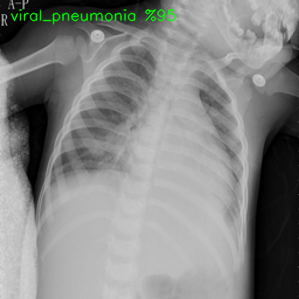

In [19]:
import cv2
import numpy as np
from ultralytics import YOLO

img_path = "/content/drive/MyDrive/YOLOV8/0_image_classification/inference/Viral Pneumonia-120.png"
model_path= "/content/drive/MyDrive/YOLOV8/0_image_classification/runs/classify/yolov8_classification2/weights/best.pt"

model = YOLO(model_path) # modeli yükleme
results = model(img_path) # resmi yükle ve sınıflandır

class_dict = results[0].names
probs = results[0].probs.data.tolist()

print("Sınıflar",class_dict)
print("Olasılıklar",probs)

print("Sonuc:",class_dict[np.argmax(probs)])

name=class_dict[np.argmax(probs)]
max_prob = int(np.max(probs) * 100)

# print(name + " " +"%" +str(max_prob))

text = name + " " +"%" +str(max_prob)

img = cv2.imread(img_path)
cv2.putText(img,text,(10,20),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)

cv2_imshow(img)
